# Curve fitting optimisation problem

A common application of optimisation is in curve fitting or paramter estimation.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy

Let's start with a simple example - fitting a straight line to some data. We'll start off with known parameters for the line $y=mx+c$.

In [2]:
m = 2.
c = 1.

In [3]:
N = 10

Here are the correct values

In [4]:
x = numpy.linspace(0, 10, N)
y = m*x + c

Let's assume we have some normally distributed measurement noise, so now we have $y_m = y + \epsilon$

In [5]:
noise = numpy.random.randn(N)
ym = y + noise

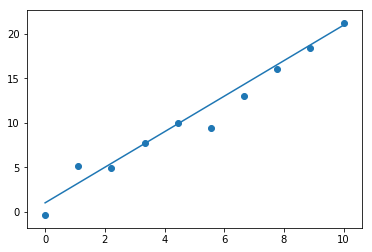

In [6]:
plt.plot(x, y)
plt.scatter(x, ym)

We will try to recover the parameters using our general purpose optimisation routines. First we define the objective function. In many cases we are trying to minimise the RMS error (root mean squared):

$$ \min_p \sqrt{\frac{\sum_i^N (y_{m,i} - y_{p,i})^2}{N}}$$ 

But since square root is a monotonic function, we will often just use the sum of the square error for fitting problems. 

$$ \min_p \sum_i^N (y_{m,i} - y_{p,i})^2$$ 

We distinguish here between $y_m$ which are the measured values and $y_p$ which are the predicted values from our model. $p$ are our parameters.


In [7]:
def linear(p):
    m, c = p
    yp = m*x + c
    return sum((ym - yp)**2)

In [8]:
linear([3, 2])

538.43082131773747

Let's see what this error surface looks like

In [9]:
searchspace = numpy.linspace(-10, 10)

In [10]:
err = numpy.array([[linear([mi, ci]) for mi in searchspace] for ci in searchspace])

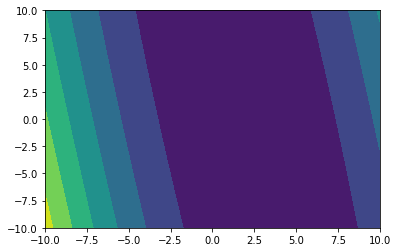

In [11]:
plt.contourf(searchspace, searchspace, err)

Looks relatively well behaved - let's also plot the square rooted version which shows more detail near the minimum

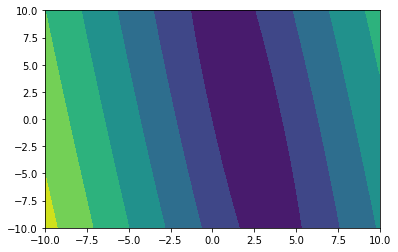

In [12]:
plt.contourf(searchspace, searchspace, numpy.sqrt(err))

So, the function seems nicely convex and well behaved. Should be no challenge for minimisation.

In [13]:
import scipy.optimize

In [14]:
result = scipy.optimize.minimize(linear, [3, 2])
result

      fun: 13.030048308009546
 hess_inv: array([[ 0.00490909, -0.02454546],
       [-0.02454546,  0.17272728]])
      jac: array([ -2.38418579e-07,  -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 1.95960158,  0.75875228])

In [15]:
m, c = result.x

In [16]:
y = m*x + c 

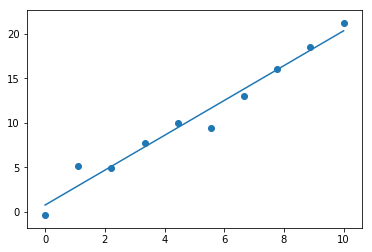

In [17]:
plt.plot(x, y)
plt.scatter(x, ym)

## Nonlinear fitting

What about more challenging functions? Once we know the general recipe it turns out to be quite easy to do. So easy in fact, that `scipy.optimize` has a dedicated function.

Let's try another example with the function $y = a\sin(bx + c)$

In [18]:
def f(x, a, b, c):
    return a*numpy.sin(b*x + c)

In [19]:
a, b, c = 2, 0.1, 4

In [20]:
y = f(x, a, b, c)
ym = y + noise*0.05

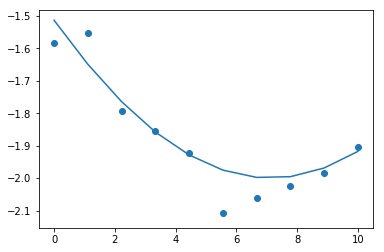

In [21]:
plt.scatter(x, ym)
plt.plot(x, y)

In [22]:
scipy.optimize.curve_fit(f, x, ym, p0=[1, 0.2, 3])

(array([ 2.03827279,  0.10826586,  3.9674734 ]),
 array([[ 0.00082922,  0.00015387, -0.00080065],
        [ 0.00015387,  0.00011114, -0.00034324],
        [-0.00080065, -0.00034324,  0.00194883]]))